>> ### *Task 1*
Access Arxiv and get metadata and store it in a file

Installing arxiv wrapper

In [1]:
!pip install arxiv

Importing the required libraries

In [2]:
import arxiv
import json
import time
import pandas as pd

In [3]:
categories = ['cs.DB','cs.GR','cs.RO','cs.ET']   #Required categories as mentioned in the task
arxiv_metadata = []  #list to store the metadata collected

#loop to fetch the data
for i in categories:
    results_generator = arxiv.Client(
        page_size=5000, delay_seconds=3, num_retries=3).results(
            arxiv.Search(
                query=i,
                sort_order=arxiv.SortOrder.Descending,
            ))
    
    # for loop to filter the data with dates and categories
    for paper in results_generator:
        if (int(paper.published.year) >= 2018) and (int(paper.published.year) <= 2022) and paper.primary_category in categories :
            arxiv_metadata.append(paper)
    


In [4]:
#display the output
arxiv_metadata

[arxiv.Result(entry_id='http://arxiv.org/abs/1903.12469v1', updated=datetime.datetime(2019, 3, 29, 12, 28, 28, tzinfo=datetime.timezone.utc), published=datetime.datetime(2019, 3, 29, 12, 28, 28, tzinfo=datetime.timezone.utc), title='Corrigendum to "Counting Database Repairs that Satisfy Conjunctive Queries with Self-Joins"', authors=[arxiv.Result.Author('Jef Wijsen')], summary='The helping Lemma 7 in [Maslowski and Wijsen, ICDT, 2014] is false. The lemma\nis used in (and only in) the proof of Theorem 3 of that same paper. In this\ncorrigendum, we provide a new proof for the latter theorem.', comment=None, journal_ref=None, doi=None, primary_category='cs.DB', categories=['cs.DB'], links=[arxiv.Result.Link('http://arxiv.org/abs/1903.12469v1', title=None, rel='alternate', content_type=None), arxiv.Result.Link('http://arxiv.org/pdf/1903.12469v1', title='pdf', rel='related', content_type=None)]),
 arxiv.Result(entry_id='http://arxiv.org/abs/1805.02622v1', updated=datetime.datetime(2018, 5, 

In [5]:
#list to store the final data
final_metadata = []
#print(type(paper.authors))
# for loop to align the data to specific columns
for paper in arxiv_metadata:
    final_metadata.append({'title':paper.title,'authors': [author.name for author in paper.authors],'summary':paper.summary,'primary_category':paper.primary_category,'published_date':paper.published})
   

In [6]:
#display the final output
final_metadata

[{'title': 'Corrigendum to "Counting Database Repairs that Satisfy Conjunctive Queries with Self-Joins"',
  'authors': ['Jef Wijsen'],
  'summary': 'The helping Lemma 7 in [Maslowski and Wijsen, ICDT, 2014] is false. The lemma\nis used in (and only in) the proof of Theorem 3 of that same paper. In this\ncorrigendum, we provide a new proof for the latter theorem.',
  'primary_category': 'cs.DB',
  'published_date': datetime.datetime(2019, 3, 29, 12, 28, 28, tzinfo=datetime.timezone.utc)},
 {'title': 'Provenance for Interactive Visualizations',
  'authors': ['Fotis Psallidas', 'Eugene Wu'],
  'summary': 'We highlight the connections between data provenance and interactive\nvisualizations. To do so, we first incrementally add interactions to a\nvisualization and show how these interactions are readily expressible in terms\nof provenance. We then describe how an interactive visualization system that\nnatively supports provenance can be easily extended with novel interactions.',
  'primary_

*Assigning the metadata to a dataframe*

In [7]:
df= pd.DataFrame(final_metadata)

*Storing the data from dataframe to csv file*

In [8]:
df.to_csv('arxiv_metadata.csv',index=False)

>> ### *Task 2*
Display the 5 lines of each category

Importing the librearies

In [1]:
import pandas as pd

Getting the data from csv file to a dataframe

In [2]:
df = pd.read_csv('arxiv_metadata.csv')

Separating the data of cs.ET and display the first 5 lines

In [3]:
ET_data = df[df['primary_category']=='cs.ET'].copy()

ET_data.head()

,title,authors,summary,primary_category,published_date
2467,A self-contained and self-explanatory DNA stor...,"['Min Li', 'Jiashu Wu', 'Junbiao Dai', 'Qingsh...",Current research on DNA storage usually focuse...,cs.ET,2022-07-19 10:54:54+00:00
2468,Efficiently Supporting Hierarchy and Data Upda...,"['Puru Sharma', 'Cheng-Kai Lim', 'Dehui Lin', ...",We propose a novel and flexible DNA-storage ar...,cs.ET,2022-12-27 11:02:13+00:00
2469,DataBright: Towards a Global Exchange for Dece...,"['David Dao', 'Dan Alistarh', 'Claudiu Musat',...","It is safe to assume that, for the foreseeable...",cs.ET,2018-02-13 18:20:07+00:00
16771,Closed-loop spiking control on a neuromorphic ...,"['Jingyue Zhao', 'Nicoletta Risi', 'Marco Monf...",Despite neuromorphic engineering promises the ...,cs.ET,2020-09-01 14:17:48+00:00
16780,Extending the D-Wave with support for Higher P...,['John E. Dorband'],D-Wave only guarantees to support coefficients...,cs.ET,2018-07-13 18:25:44+00:00


Separating the data of cs.GR and display the first 5 lines

In [4]:
GR_data = df[df['primary_category']=='cs.GR'].copy()

GR_data.head()

,title,authors,summary,primary_category,published_date
2465,Representing Whole Slide Cancer Image Features...,"['Erich Bremer', 'Jonas Almeida', 'Joel Saltz']",Regions of Interest (ROI) contain morphologica...,cs.GR,2020-05-13 16:38:24+00:00
2466,HiVision: Rapid Visualization of Large-Scale S...,"['Mengyu Ma', 'Ye Wu', 'Xue Ouyang', 'Luo Chen...",Rapid visualization of large-scale spatial vec...,cs.GR,2020-05-26 02:48:40+00:00
2470,Least-Squares Affine Reflection Using Eigen De...,['Alec Jacobson'],This note summarizes the steps to computing th...,cs.GR,2020-06-10 21:50:02+00:00
2471,A novel 3D display based on micro-volumetric s...,['Guangjun Wang'],The present study proposes a novel 3D display ...,cs.GR,2018-12-16 13:06:49+00:00
2472,Global Illumination of non-Euclidean spaces,"['Tiago Novello', 'Vinicius da Silva', 'Luiz V...",This paper presents a path tracer algorithm to...,cs.GR,2020-03-24 22:21:28+00:00


Separating the data of cs.RO and display the first 5 lines

In [5]:
RO_data = df[df['primary_category']=='cs.RO'].copy()

RO_data.head()

,title,authors,summary,primary_category,published_date
2459,Automatic generation of ground truth for the e...,"['Hatem Hajri', 'Emmanuel Doucet', 'Marc Revil...",As automated vehicles are getting closer to be...,cs.RO,2018-07-16 08:20:40+00:00
2460,EU Long-term Dataset with Multiple Sensors for...,"['Zhi Yan', 'Li Sun', 'Tomas Krajnik', 'Yassin...",The field of autonomous driving has grown trem...,cs.RO,2019-09-07 20:23:00+00:00
2461,Scalable Unsupervised Multi-Criteria Trajector...,"['Florian Barth', 'Stefan Funke', 'Tobias Skov...",We present analysis techniques for large traje...,cs.RO,2020-10-23 12:32:26+00:00
2462,Organization and Understanding of a Tactile In...,"['Peng Wang', 'Jixiao Liu', 'Funing Hou', 'Dic...",Advanced service robots require superior tacti...,cs.RO,2021-08-09 02:02:17+00:00
3332,"Autocorrelation, Wigner and Ambiguity Transfor...","['Jacob Mackay', 'David Johnson', 'Graham Broo...",Simulating the radar illumination of large sce...,cs.RO,2022-02-06 01:47:32+00:00


Separating the data of cs.DB and display the first 5 lines

In [6]:
DB_data = df[df['primary_category']=='cs.DB'].copy()

DB_data.head()

,title,authors,summary,primary_category,published_date
0,"Corrigendum to ""Counting Database Repairs that...",['Jef Wijsen'],"The helping Lemma 7 in [Maslowski and Wijsen, ...",cs.DB,2019-03-29 12:28:28+00:00
1,Provenance for Interactive Visualizations,"['Fotis Psallidas', 'Eugene Wu']",We highlight the connections between data prov...,cs.DB,2018-05-07 17:11:39+00:00
2,A framework supporting imprecise queries and data,['Giacomo Bergami'],This technical report provides some lightweigh...,cs.DB,2019-12-28 21:58:43+00:00
3,Open Data Portal Germany (OPAL) Projektergebnisse,"['Adrian Wilke', 'Axel-Cyrille Ngonga Ngomo']",In the Open Data Portal Germany (OPAL) project...,cs.DB,2021-05-07 10:59:16+00:00
4,Big Data Visualization Tools,['Nikos Bikakis'],Data visualization is the presentation of data...,cs.DB,2018-01-25 10:16:48+00:00


>> ### *Task 3*
For each of the four primary categories considered 
(2018-2022) , draw a pie chart with slices (%age) for 
➢single author papers
➢two authors papers
➢3-4 authors papers
➢ More than four authors.

Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Read the CSV file and extract required columns

In [2]:
df = pd.read_csv('arxiv_metadata.csv', usecols=['authors', 'primary_category'])
#print(df)
categories = ['cs.DB', 'cs.GR', 'cs.RO', 'cs.ET'] #caegories that needs be ploted


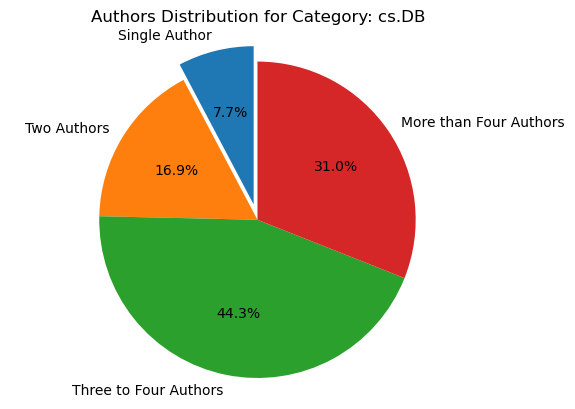

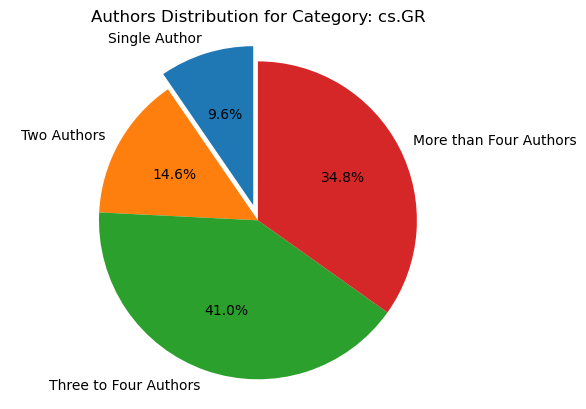

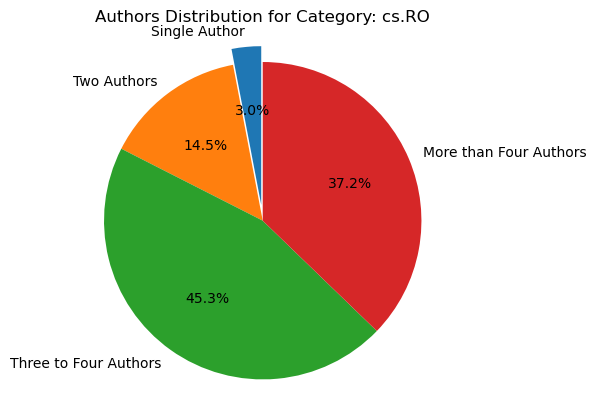

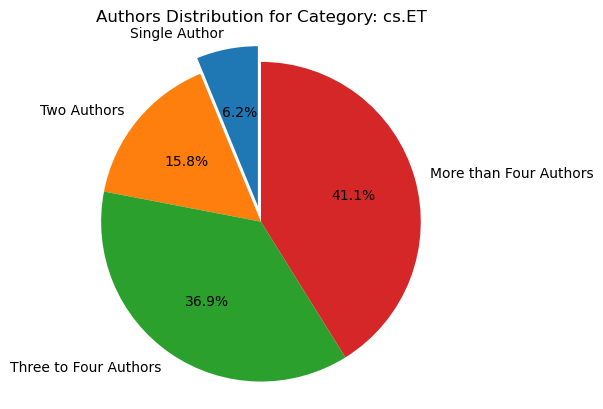

In [3]:
# for loop segragete the data with primary categories
for category in categories:
    category_df = df[df['primary_category'] == category]
    
    # using variable to count the occurences
    single_authors = 0
    two_authors = 0
    three_four_authors = 0
    more_than_four_authors = 0
    
    # checking each cell and incresing the counter as needed using if condition
    for index, row in category_df.iterrows():
        num_authors = row['authors'].count(',') + 1
        
        if num_authors > 4:
            more_than_four_authors += 1
        elif num_authors == 3 or num_authors == 4:
            three_four_authors += 1
        elif num_authors == 2:
            two_authors += 1
        elif num_authors == 1:
            single_authors += 1
    
    #print(category, single_authors, two_authors, three_four_authors, more_than_four_authors)
    # Create a pie chart
    labels = ['Single Author', 'Two Authors', 'Three to Four Authors', 'More than Four Authors']
    sizes = [single_authors, two_authors, three_four_authors, more_than_four_authors]
    explode = (0.1, 0, 0, 0)  # explode the first slice for emphasis
    
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(f'Authors Distribution for Category: {category}')
    plt.show()


>> ### *Task 4*
Make a bar graph, with years on X axis and Number of papers on Y axis for each category

Importing the requird libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Read the csv file and adding new column 'published_year' to store the year of publication

In [2]:
df = pd.read_csv('arxiv_metadata.csv')
df['published_date'] = pd.to_datetime(df['published_date'])
df['published_year'] = df['published_date'].dt.year

# Group the data by year and category and count the number of papers
grouped = df.groupby(['published_year', 'primary_category']).size().unstack()

In [3]:
# Get the unique categories and years
categories = df['primary_category'].unique()
years = sorted(df['published_year'].unique())  # Sort the years in ascending order

# Set the width of each bar
bar_width = 0.2

In [4]:
# Set the position of each bar on the x-axis
r = range(len(years))
bar_positions = [list(map(lambda x: x + bar_width*i, r)) for i in range(len(categories))]


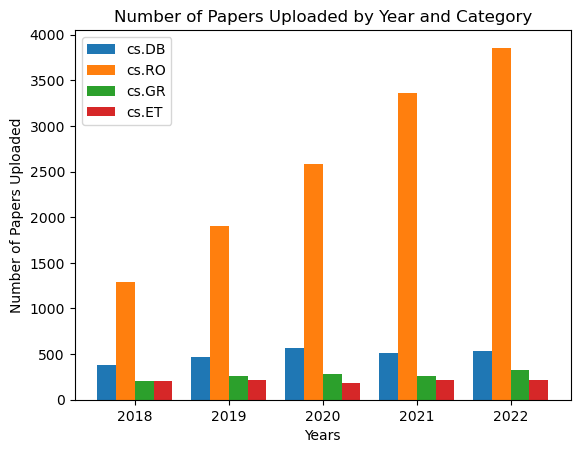

In [5]:
# Create the bar graph
fig, ax = plt.subplots()

# Create bars for each category
for i, category in enumerate(categories):
    ax.bar(bar_positions[i], grouped.loc[:, category], width=bar_width, label=category)

# Set labels, title, and legend
ax.set_xlabel('Years')
ax.set_ylabel('Number of Papers Uploaded')
ax.set_title('Number of Papers Uploaded by Year and Category')
ax.set_xticks([r + (len(categories) - 1) * bar_width / 2 for r in range(len(years))])
ax.set_xticklabels(years)
ax.legend()

# Display the bar graph
plt.show()


>> ### *Bonus Task*
Print the top 3 authors of each category who involved in maximum number of papers of that category

Importing the required libraries

In [1]:
import csv
import ast
from collections import Counter

Function to find the top authors of each category

In [2]:
def find_top_authors_by_category(csv_file, categories):
    top_authors_by_category = {category: [] for category in categories}

    with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            category = row['primary_category']
            if category in categories:
                author_list = ast.literal_eval(row['authors'])
                top_authors_by_category[category].extend(author_list)

    top_authors = {}
    for category, authors in top_authors_by_category.items():
        author_counts = Counter(authors)
        top_authors[category] = author_counts.most_common(3)

    return top_authors

In [3]:
# Read the CSV file
csv_file = 'arxiv_metadata.csv'
categories = ['cs.DB', 'cs.RO', 'cs.GR']  #primary categories that are to be analysed
top_authors = find_top_authors_by_category(csv_file, categories)   #calling the function


Printing the results

In [4]:
for category, authors in top_authors.items():
    print(f"Top 3 authors in category '{category}':")
    for author, count in authors:
        print(f"{author}: {count}")
    print()

Top 3 authors in category 'cs.DB':
Wensheng Gan: 38
Philip S. Yu: 27
Tim Kraska: 26

Top 3 authors in category 'cs.RO':
Roland Siegwart: 121
Dieter Fox: 90
Dinesh Manocha: 80

Top 3 authors in category 'cs.GR':
Daniel Cohen-Or: 26
Lin Gao: 23
Alec Jacobson: 21

